In [2]:
##Importing relevant modules

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedGroupKFold

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, f1_score


In [3]:
#Importing the dataset nto a pandas dataframe

df_train = pd.read_csv(r"C:\Users\USER\Desktop\nkay_ds\FORCE_LITHO\CSV_train.csv", sep = ";", low_memory = False)
df_test = pd.read_csv(r"C:\Users\USER\Desktop\nkay_ds\FORCE_LITHO\CSV_test.csv", sep = ";", low_memory = False)

In [4]:
#Viewing the train dataset
df_train.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [5]:
#Viewing the test dataset
df_test.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [6]:
#Checking the size of the dataset
len(df_train), len(df_test)

(1170511, 136786)

In [7]:
#Checking the number of columns present in both
len(df_train.columns), len(df_test.columns)

(29, 27)

In [8]:
#Checking for the difference in the columns present

df_train.columns.difference(df_test.columns)

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY'], dtype='object')

In [9]:
df_test.columns.difference(df_train.columns)

Index([], dtype='object')

In [10]:
#Checking for the percentage of missing values in the dataframe
# Columns with way above 50% of missing data will be dropped
print(df_train.isna().sum()*100/len(df_train))

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.920538
Y_LOC                                 0.920538
Z_LOC                                 0.920538
GROUP                                 0.109183
FORMATION                            11.703777
CALI                                  7.507576
RSHA                                 46.121822
RMED                                  3.331280
RDEP                                  0.941042
RHOB                                 13.777658
GR                                    0.000000
SGR                                  94.074981
NPHI                                 34.608987
PEF                                  42.615490
DTC                                   6.908350
SP                                   26.164983
BS                                   41.678720
ROP                                  54.287401
DTS                                  85.082327
DCAL         

In [11]:
#Checking for the percentage of missing values in the dataframe
# Columns with way above 50% of missing data will be dropped

print(df_test.isna().sum()*100/len(df_test))

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          0.043133
Y_LOC          0.043133
Z_LOC          0.043133
GROUP          0.000000
FORMATION      5.171582
CALI           4.126884
RSHA          71.417397
RMED           0.429137
RDEP           0.043133
RHOB          12.398930
GR             0.000000
SGR          100.000000
NPHI          23.937391
PEF           17.021479
DTC            0.601670
SP            51.291068
BS            51.044698
ROP           50.056292
DTS           68.403199
DCAL          90.119603
DRHO          18.444870
MUDWEIGHT     85.181963
RMIC          91.727224
ROPA          59.213662
RXO           78.179053
dtype: float64


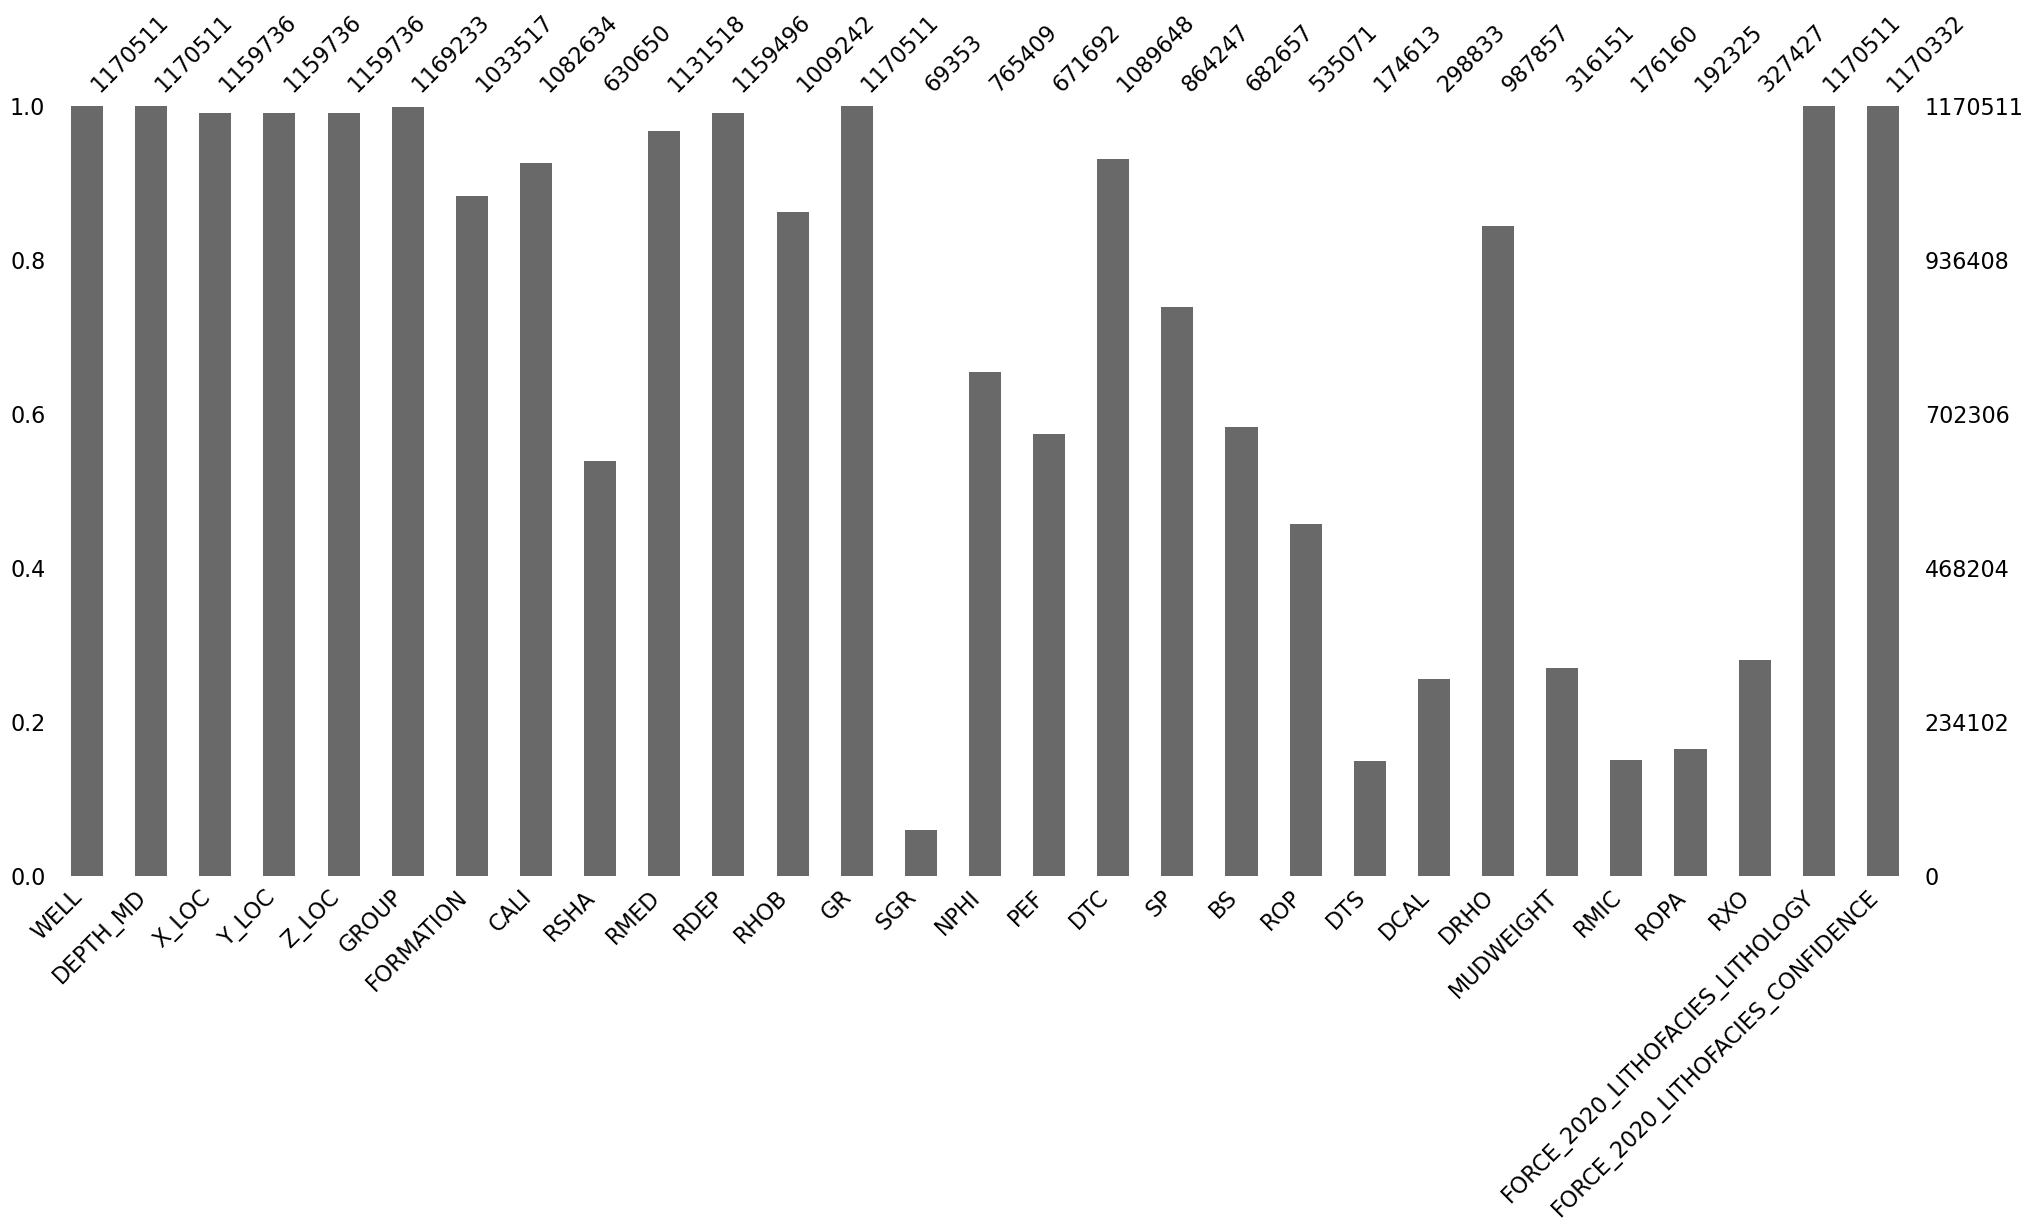

In [12]:
#Visualizing this for better understanding

mno.bar(df_train);

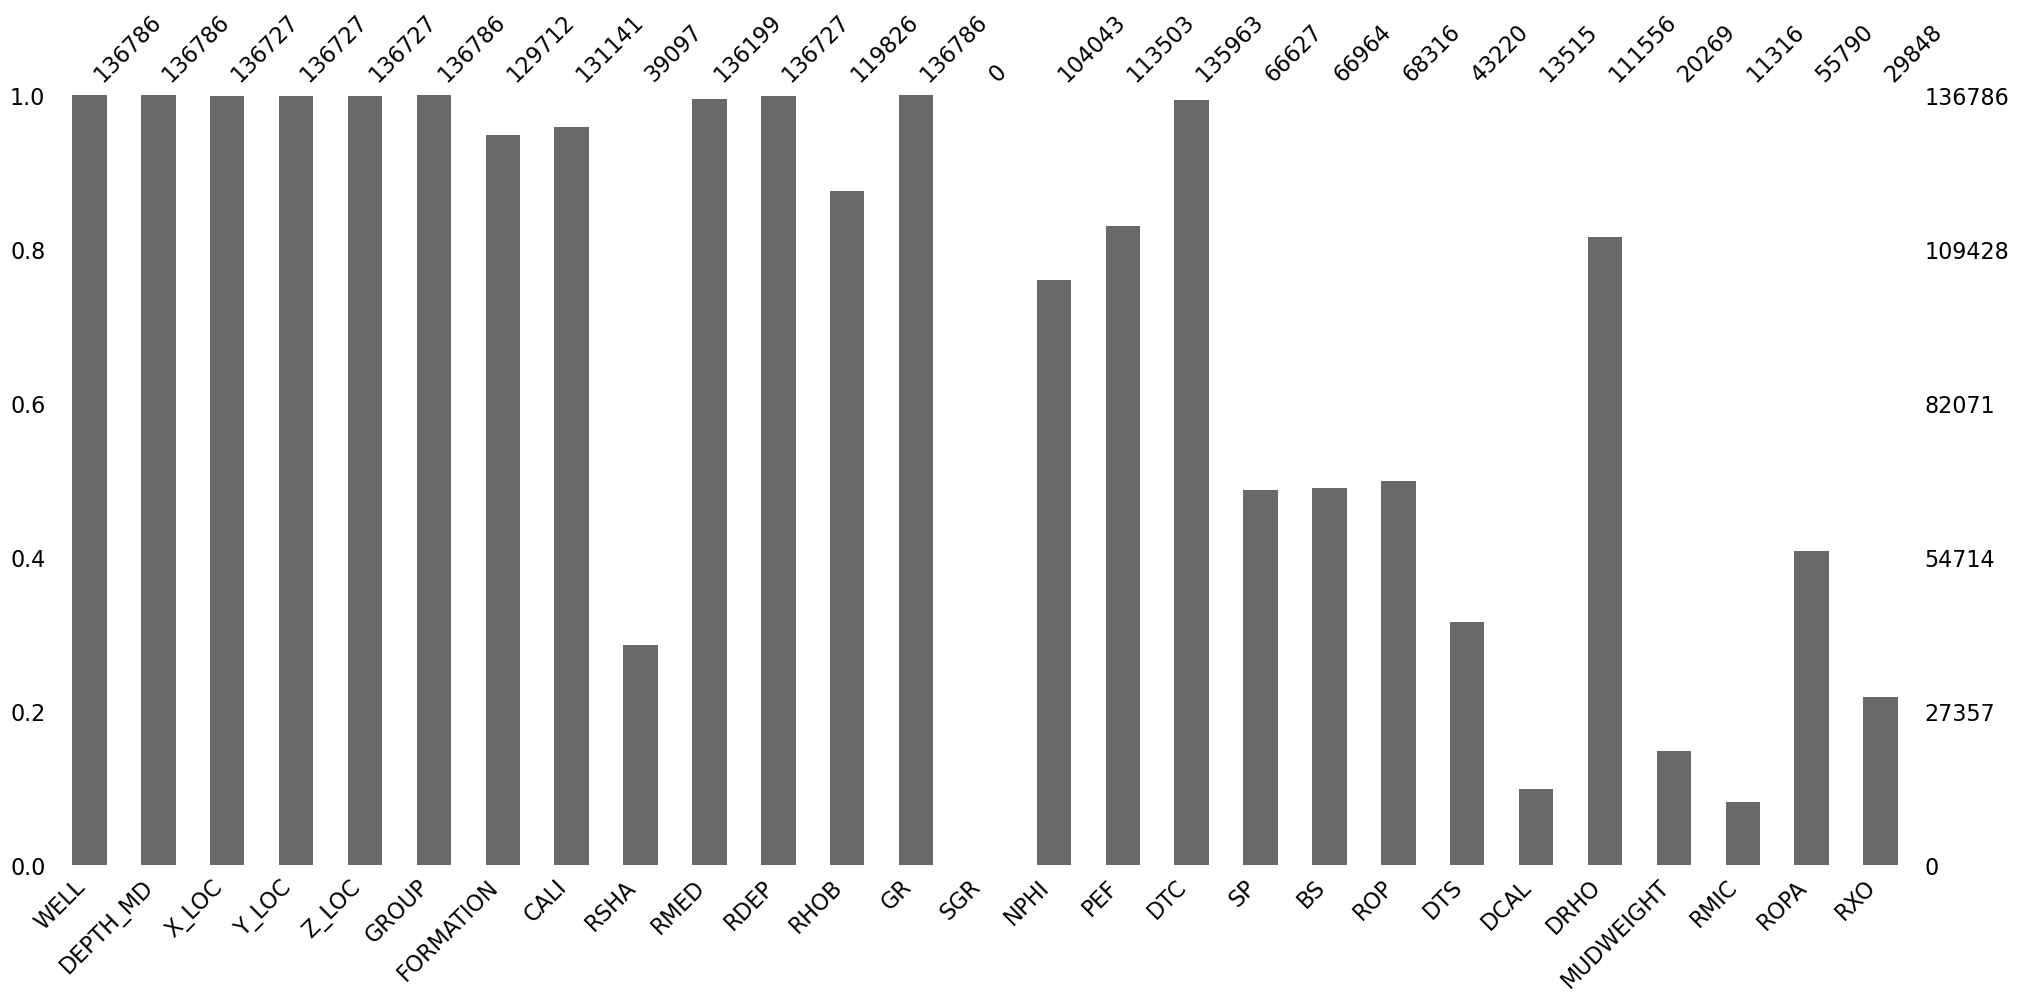

In [13]:
mno.bar(df_test);

#Noted - SGR, DCAL, RMIC, Mudweight are almost completely misssing and this imbalance would be handled subsequently

In [14]:
#Checking the datatypes on the columns as categorical and numeric data would be handled differently

df_train.dtypes

#Noticed that asides from Well, Group and Group Formation, all other data are numeric

WELL                                  object
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
GROUP                                 object
FORMATION                             object
CALI                                 float64
RSHA                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
SGR                                  float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
SP                                   float64
BS                                   float64
ROP                                  float64
DTS                                  float64
DCAL                                 float64
DRHO      

In [15]:
df_test.dtypes

WELL          object
DEPTH_MD     float64
X_LOC        float64
Y_LOC        float64
Z_LOC        float64
GROUP         object
FORMATION     object
CALI         float64
RSHA         float64
RMED         float64
RDEP         float64
RHOB         float64
GR           float64
SGR          float64
NPHI         float64
PEF          float64
DTC          float64
SP           float64
BS           float64
ROP          float64
DTS          float64
DCAL         float64
DRHO         float64
MUDWEIGHT    float64
RMIC         float64
ROPA         float64
RXO          float64
dtype: object

In [16]:
#Confirming the number of unique wells present in the dataset

df_train.WELL.unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [17]:
df_test.WELL.unique()

array(['15/9-14', '25/10-10', '25/11-24', '25/5-3', '29/3-1',
       '34/10-16 R', '34/3-3 A', '34/6-1 S', '35/6-2 S', '35/9-8'],
      dtype=object)

In [18]:
df_train.WELL.nunique()
print(f"There are {df_train.WELL.nunique()} wells in this training dataset")

There are 98 wells in this training dataset


In [19]:
df_test.WELL.nunique()
print(f"There are {df_test.WELL.nunique()} wells in this test dataset")

There are 10 wells in this test dataset


In [20]:
#Checking to see if there are overlapping wells in the dataset
train_unique = df_train.WELL.unique()
test_unique = df_test.WELL.unique()

 
overlapping_wells = []
for element in test_unique:
    if element in train_unique:
        overlapping_wells.append(element)
 
print(f"There are {len(overlapping_wells)} overlapping wells in the dataset")

There are 0 overlapping wells in the dataset


In [21]:
#Checking the unique groups and formations in the dataset
train_groups = df_train.GROUP.nunique()
print(f"There are {train_groups} GROUPS in the training dataset")

There are 14 GROUPS in the training dataset


In [22]:
df_train.GROUP.value_counts()

HORDALAND GP.       293155
SHETLAND GP.        234028
VIKING GP.          131999
ROGALAND GP.        131944
DUNLIN GP.          119085
NORDLAND GP.        111490
CROMER KNOLL GP.     52320
BAAT GP.             35823
VESTLAND GP.         26116
HEGRE GP.            13913
ZECHSTEIN GP.        12238
BOKNFJORD GP.         3125
ROTLIEGENDES GP.      2792
TYNE GP.              1205
Name: GROUP, dtype: int64

In [23]:
test_groups = df_test.GROUP.nunique()
print(f"There are {test_groups} GROUPS in the training dataset")

There are 11 GROUPS in the training dataset


In [24]:
df_train.GROUP.value_counts()

HORDALAND GP.       293155
SHETLAND GP.        234028
VIKING GP.          131999
ROGALAND GP.        131944
DUNLIN GP.          119085
NORDLAND GP.        111490
CROMER KNOLL GP.     52320
BAAT GP.             35823
VESTLAND GP.         26116
HEGRE GP.            13913
ZECHSTEIN GP.        12238
BOKNFJORD GP.         3125
ROTLIEGENDES GP.      2792
TYNE GP.              1205
Name: GROUP, dtype: int64

In [25]:
train_group = df_train.GROUP.unique()
test_group = df_test.GROUP.unique()

missing_groups = []
for group in train_group:
    if group not in test_group:
        missing_groups.append(group)
print(missing_groups)

['ROTLIEGENDES GP.', 'TYNE GP.', 'BOKNFJORD GP.', nan]


In [26]:
#Checking the formations present in both datasets
df_train.FORMATION.value_counts(), df_train.FORMATION.nunique()

(Utsira Fm.               172636
 Kyrre Fm.                 94328
 Lista Fm.                 71080
 Heather Fm.               65041
 Skade Fm.                 45983
                           ...  
 Broom Fm.                   235
 Intra Balder Fm. Sst.       177
 Farsund Fm.                 171
 Flekkefjord Fm.             118
 Egersund Fm.                105
 Name: FORMATION, Length: 69, dtype: int64,
 69)

In [27]:
df_test.FORMATION.value_counts(),  df_test.FORMATION.nunique()

(Kyrre Fm.                 27258
 Utsira Fm.                21989
 Grid Fm.                   8144
 Tryggvason Fm.             7917
 Statfjord Fm.              4960
 Lista Fm.                  4716
 Skade Fm.                  4547
 Amundsen Fm.               3952
 Ness Fm.                   3665
 Heather Fm.                3586
 Jorsalfare Fm.             3502
 Drake Fm.                  2913
 Cook Fm.                   2834
 Svarte Fm.                 2564
 Skagerrak Fm.              2487
 Aasgard Fm.                2458
 Agat Fm.                   2448
 Heimdal Fm.                2118
 Burton Fm.                 1826
 Balder Fm.                 1721
 Rannoch Fm.                1310
 Ty Fm.                     1250
 Sele Fm.                   1132
 Tor Fm.                    1079
 Smith Bank Fm.             1056
 Hod Fm.                     993
 Roedby Fm.                  942
 Intra Heather Fm. Sst.      888
 Sleipner Fm.                843
 Etive Fm.                   670
 Tarbert F

In [28]:
df_train.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [29]:
#Renaming the last two columns for better visualization

df_train.rename(columns = {'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE':'CONFIDENCE'}, inplace = True)

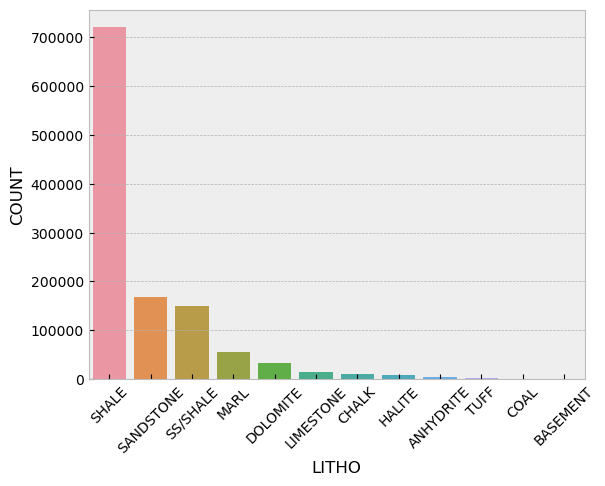

In [133]:
#Checking the lithology type present
LITHOFACIES = ["SHALE", "SANDSTONE", "SS/SHALE", "MARL", "DOLOMITE", "LIMESTONE", "CHALK", "HALITE", "ANHYDRITE", "TUFF", "COAL", "BASEMENT"]
dict(zip(df_train.LITHOLOGY.unique(), LITHOFACIES))
dtrain = df_train.LITHOLOGY.value_counts()
d1 = pd.DataFrame(dtrain.items(), columns=['LITHOFACIES', 'COUNT'])
d1["LITHO"] = LITHOFACIES
sns.barplot(x = "LITHO", y = "COUNT", data = d1)
plt.xticks(rotation=45);


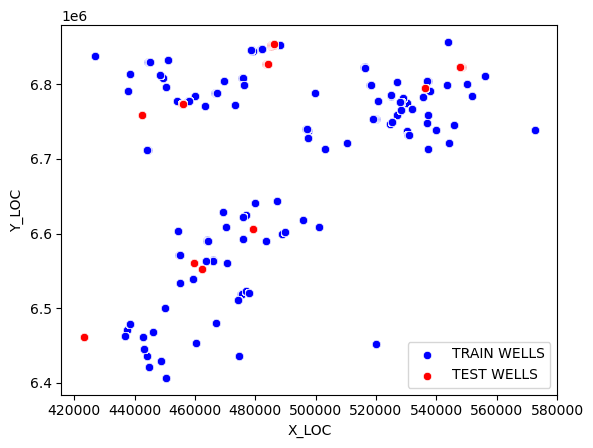

In [32]:
#CHECKING TO SEE THE SPATIAL DISTRIBUTION OF THE TRAINING AND TEST

from turtle import color

sns.scatterplot(data = df_train, x = "X_LOC", y = "Y_LOC", color = "blue")
sns.scatterplot(data = df_test, x = "X_LOC", y = "Y_LOC", color = "red")
plt.legend(labels=["TRAIN WELLS","TEST WELLS"]);


C:\Users\USER\AppData\Local\Temp\ipykernel_15396\1081381678.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = "Gamma Ray - API")


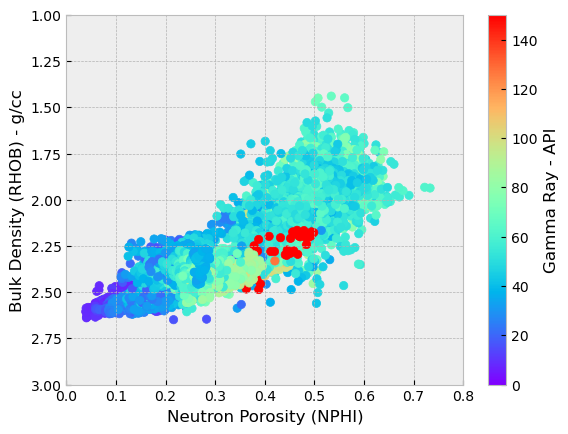

In [33]:

#Doing a little bit of visualization from some test and train wells
#Creating a Neutron - Density Crossplot

sample_train_well = df_train.loc[df_train.WELL == "15/9-15"]

plt.style.use("bmh")
plt.scatter(x = "NPHI", y = "RHOB", data = sample_train_well, c = "GR", vmin = 0, vmax = 150, cmap = "rainbow")

plt.xlim(0,0.8)
plt.ylim(3.0,1.0)

plt.xlabel("Neutron Porosity (NPHI)")
plt.ylabel("Bulk Density (RHOB) - g/cc")

plt.colorbar(label = "Gamma Ray - API")

plt.show();


C:\Users\USER\AppData\Local\Temp\ipykernel_15396\3511198718.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = "Gamma Ray - API")


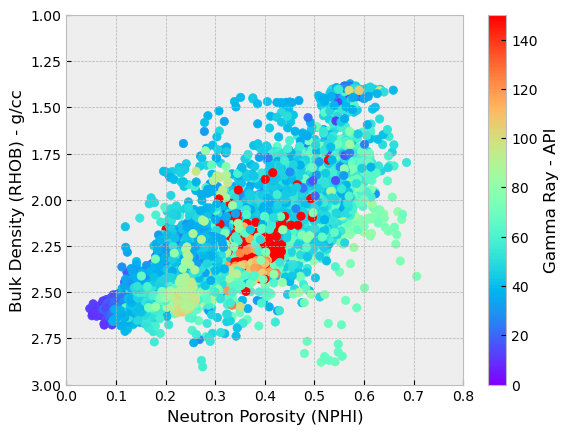

In [34]:
sample_test_well = df_test.loc[df_test.WELL == "15/9-14"]

plt.style.use("bmh")
plt.scatter(x = "NPHI", y = "RHOB", data = sample_test_well, c = "GR", vmin = 0, vmax = 150, cmap = "rainbow")

plt.xlim(0,0.8)
plt.ylim(3.0,1.0)

plt.xlabel("Neutron Porosity (NPHI)")
plt.ylabel("Bulk Density (RHOB) - g/cc")

plt.colorbar(label = "Gamma Ray - API")

plt.show();


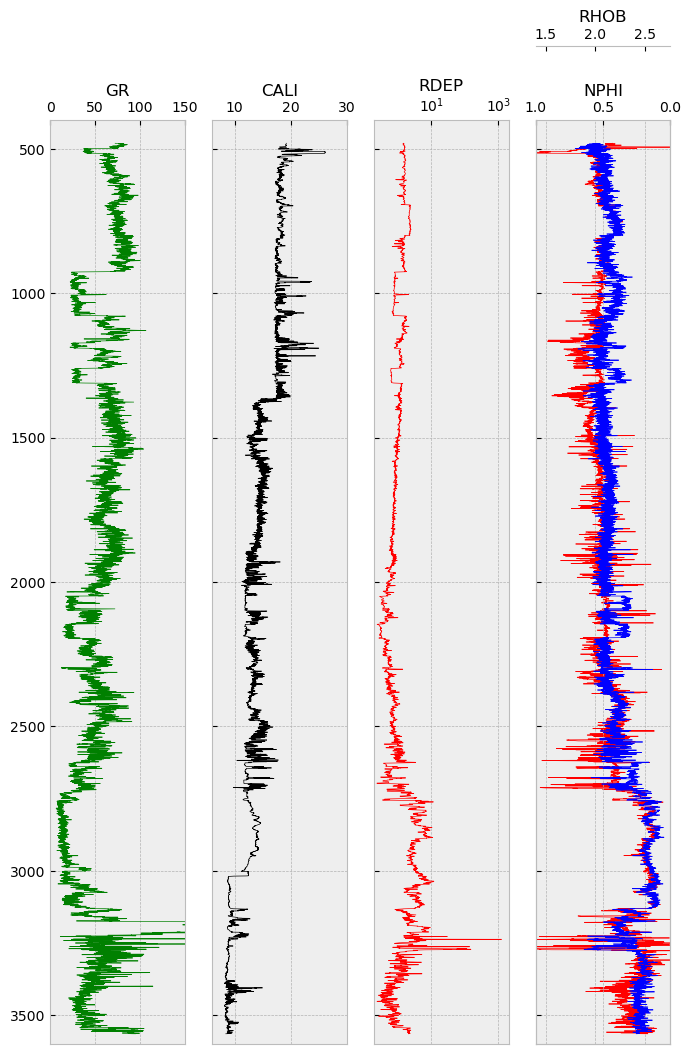

In [98]:
#Visualizing well logs from our selected wells


def plot_well_logs (data):
    fig,axes = plt.subplots(figsize = (8,12))

    #Setting up the plot axes
    ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
    ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
    ax4 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)
    ax5 = ax4.twiny()

    #Setting up the individual logtracks
    ax1.plot ("GR", "DEPTH_MD", data = data, color = "green", lw = 0.5)
    ax1.set_xlim(0, 150)
    ax1.xaxis.set_ticks_position("top")
    ax1.xaxis.set_label_position("top")
    ax1.set_xlabel("GR")
    ax1.set_ylim(3600,400)

    ax2.plot ("CALI", "DEPTH_MD", data = data, color = "black", lw = 0.5)
    ax2.set_xlim(6, 30)
    ax2.xaxis.set_ticks_position("top")
    ax2.xaxis.set_label_position("top")
    ax2.set_xlabel("CALI")
    ax2.set_ylim(3600,400)

    ax3.plot ("RDEP", "DEPTH_MD", data = data, color = "red", lw = 0.5)
    ax3.set_xlim(0.2, 2000)
    ax3.semilogx()
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")
    ax3.set_xlabel("RDEP")
    ax3.set_ylim(3600,400)

    ax4.plot ("RHOB", "DEPTH_MD", data = data, color = "red", lw = 0.5)
    ax4.set_xlim(1.4, 2.75)
    ax4.xaxis.set_ticks_position("top")
    ax4.spines["top"].set_position(("axes", 1.08))
    ax4.xaxis.set_label_position("top")
    ax4.set_xlabel("RHOB")
    ax4.set_ylim(3600,400)

    ax5.plot ("NPHI", "DEPTH_MD", data = data, color = "blue", lw = 0.5)
    ax5.set_xlim(1.0, 0)
    ax5.xaxis.set_ticks_position("top")
    ax5.xaxis.set_label_position("top")
    ax5.set_xlabel("NPHI")
    ax5.set_ylim(3600,400)

    for ax in [ax2, ax3, ax4]:
        plt.setp(ax.get_yticklabels(), visible = False)

plot_well_logs(sample_test_well)


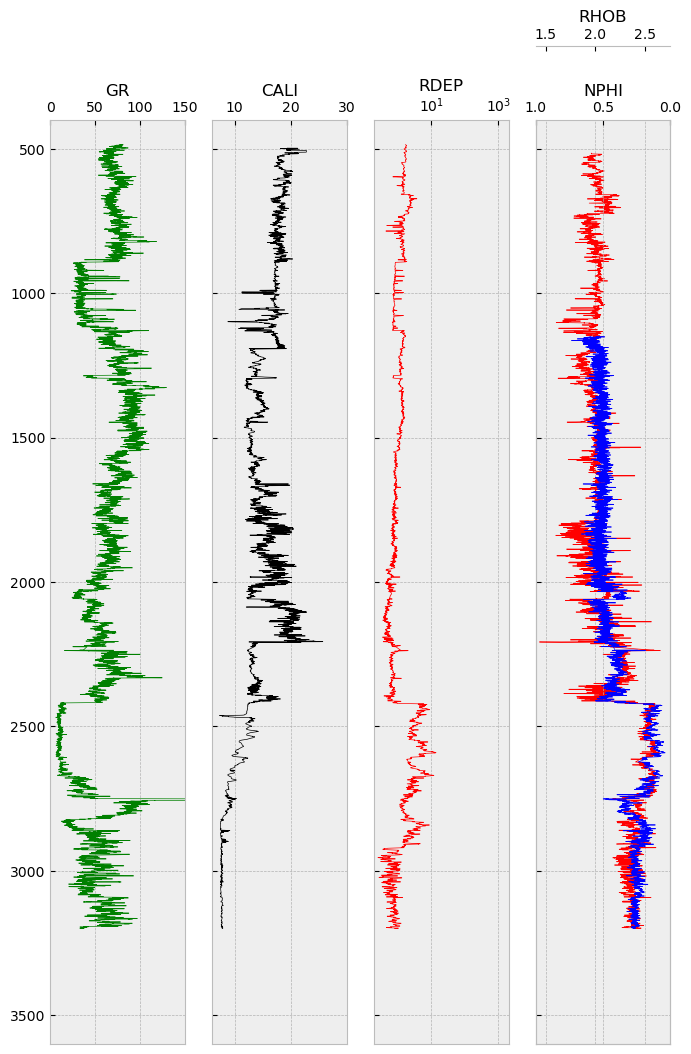

In [99]:
plot_well_logs(sample_train_well)